In [843]:
import numpy as np
from matplotlib import pylab as plt
import cv2
import tensorflow as tf
import glob

In [844]:
import os
import pathlib
import time
import datetime
from IPython import display

In [845]:
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, ReLU, Dropout, Conv2DTranspose, Input, Concatenate, ZeroPadding2D
from keras.optimizers import Adam
from keras.models import Model, Sequential

In [846]:
input_images_train = []
files = glob.glob("trainB\*.jpg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    input_images_train.append (image)

input_images_train = np.array(input_images_train).astype('float32')
input_images_train = input_images_train[:, ...,::-1]                 # to maintain original colour.
# Source - https://stackoverflow.com/questions/50630825/matplotlib-imshow-distorting-colors

trainB\100_B.jpg
trainB\101_B.jpg
trainB\102_B.jpg
trainB\103_B.jpg
trainB\104_B.jpg
trainB\105_B.jpg
trainB\106_B.jpg
trainB\107_B.jpg
trainB\108_B.jpg
trainB\109_B.jpg
trainB\10_B.jpg
trainB\110_B.jpg
trainB\111_B.jpg
trainB\112_B.jpg
trainB\113_B.jpg
trainB\114_B.jpg
trainB\115_B.jpg
trainB\116_B.jpg
trainB\117_B.jpg
trainB\118_B.jpg
trainB\119_B.jpg
trainB\11_B.jpg
trainB\120_B.jpg
trainB\121_B.jpg
trainB\122_B.jpg
trainB\123_B.jpg
trainB\124_B.jpg
trainB\125_B.jpg
trainB\126_B.jpg
trainB\127_B.jpg
trainB\128_B.jpg
trainB\129_B.jpg
trainB\12_B.jpg
trainB\130_B.jpg
trainB\131_B.jpg
trainB\132_B.jpg
trainB\133_B.jpg
trainB\134_B.jpg
trainB\135_B.jpg
trainB\136_B.jpg
trainB\137_B.jpg
trainB\138_B.jpg
trainB\139_B.jpg
trainB\13_B.jpg
trainB\140_B.jpg
trainB\141_B.jpg
trainB\142_B.jpg
trainB\143_B.jpg
trainB\144_B.jpg
trainB\145_B.jpg
trainB\146_B.jpg
trainB\147_B.jpg
trainB\148_B.jpg
trainB\149_B.jpg
trainB\14_B.jpg
trainB\150_B.jpg
trainB\151_B.jpg
trainB\152_B.jpg
trainB\153_B.jpg
tr

In [847]:
real_images_train = []
files = glob.glob("trainA\*.jpg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    real_images_train.append (image)

real_images_train = np.array(real_images_train).astype('float32')
real_images_train = real_images_train[:, ...,::-1]                    

trainA\100_A.jpg
trainA\101_A.jpg
trainA\102_A.jpg
trainA\103_A.jpg
trainA\104_A.jpg
trainA\105_A.jpg
trainA\106_A.jpg
trainA\107_A.jpg
trainA\108_A.jpg
trainA\109_A.jpg
trainA\10_A.jpg
trainA\110_A.jpg
trainA\111_A.jpg
trainA\112_A.jpg
trainA\113_A.jpg
trainA\114_A.jpg
trainA\115_A.jpg
trainA\116_A.jpg
trainA\117_A.jpg
trainA\118_A.jpg
trainA\119_A.jpg
trainA\11_A.jpg
trainA\120_A.jpg
trainA\121_A.jpg
trainA\122_A.jpg
trainA\123_A.jpg
trainA\124_A.jpg
trainA\125_A.jpg
trainA\126_A.jpg
trainA\127_A.jpg
trainA\128_A.jpg
trainA\129_A.jpg
trainA\12_A.jpg
trainA\130_A.jpg
trainA\131_A.jpg
trainA\132_A.jpg
trainA\133_A.jpg
trainA\134_A.jpg
trainA\135_A.jpg
trainA\136_A.jpg
trainA\137_A.jpg
trainA\138_A.jpg
trainA\139_A.jpg
trainA\13_A.jpg
trainA\140_A.jpg
trainA\141_A.jpg
trainA\142_A.jpg
trainA\143_A.jpg
trainA\144_A.jpg
trainA\145_A.jpg
trainA\146_A.jpg
trainA\147_A.jpg
trainA\148_A.jpg
trainA\149_A.jpg
trainA\14_A.jpg
trainA\150_A.jpg
trainA\151_A.jpg
trainA\152_A.jpg
trainA\153_A.jpg
tr

In [848]:
input_images_test = []
files = glob.glob("testB\*.jpg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    input_images_test.append (image)

input_images_test = np.array(input_images_test).astype('float32')
input_images_test = input_images_test[:, ...,::-1]

testB\1.jpg
testB\10.jpg
testB\100.jpg
testB\101.jpg
testB\102.jpg
testB\103.jpg
testB\104.jpg
testB\105.jpg
testB\106.jpg
testB\11.jpg
testB\12.jpg
testB\13.jpg
testB\14.jpg
testB\15.jpg
testB\16.jpg
testB\17.jpg
testB\18.jpg
testB\19.jpg
testB\2.jpg
testB\20.jpg
testB\21.jpg
testB\22.jpg
testB\23.jpg
testB\24.jpg
testB\25.jpg
testB\26.jpg
testB\27.jpg
testB\28.jpg
testB\29.jpg
testB\3.jpg
testB\30.jpg
testB\31.jpg
testB\32.jpg
testB\33.jpg
testB\34.jpg
testB\35.jpg
testB\36.jpg
testB\37.jpg
testB\38.jpg
testB\39.jpg
testB\4.jpg
testB\40.jpg
testB\41.jpg
testB\42.jpg
testB\43.jpg
testB\44.jpg
testB\45.jpg
testB\46.jpg
testB\47.jpg
testB\48.jpg
testB\49.jpg
testB\5.jpg
testB\50.jpg
testB\51.jpg
testB\52.jpg
testB\53.jpg
testB\54.jpg
testB\55.jpg
testB\56.jpg
testB\57.jpg
testB\58.jpg
testB\59.jpg
testB\6.jpg
testB\60.jpg
testB\61.jpg
testB\62.jpg
testB\63.jpg
testB\64.jpg
testB\65.jpg
testB\66.jpg
testB\67.jpg
testB\68.jpg
testB\69.jpg
testB\7.jpg
testB\70.jpg
testB\71.jpg
testB\72.jpg

In [849]:
real_images_test = []
files = glob.glob("testA\*.jpg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    real_images_test.append (image)

real_images_test = np.array(real_images_test).astype('float32')
real_images_test = real_images_test[:, ...,::-1]  

testA\1.jpg
testA\10.jpg
testA\100.jpg
testA\101.jpg
testA\102.jpg
testA\103.jpg
testA\104.jpg
testA\105.jpg
testA\106.jpg
testA\11.jpg
testA\12.jpg
testA\13.jpg
testA\14.jpg
testA\15.jpg
testA\16.jpg
testA\17.jpg
testA\18.jpg
testA\19.jpg
testA\2.jpg
testA\20.jpg
testA\21.jpg
testA\22.jpg
testA\23.jpg
testA\24.jpg
testA\25.jpg
testA\26.jpg
testA\27.jpg
testA\28.jpg
testA\29.jpg
testA\3.jpg
testA\30.jpg
testA\31.jpg
testA\32.jpg
testA\33.jpg
testA\34.jpg
testA\35.jpg
testA\36.jpg
testA\37.jpg
testA\38.jpg
testA\39.jpg
testA\4.jpg
testA\40.jpg
testA\41.jpg
testA\42.jpg
testA\43.jpg
testA\44.jpg
testA\45.jpg
testA\46.jpg
testA\47.jpg
testA\48.jpg
testA\49.jpg
testA\5.jpg
testA\50.jpg
testA\51.jpg
testA\52.jpg
testA\53.jpg
testA\54.jpg
testA\55.jpg
testA\56.jpg
testA\57.jpg
testA\58.jpg
testA\59.jpg
testA\6.jpg
testA\60.jpg
testA\61.jpg
testA\62.jpg
testA\63.jpg
testA\64.jpg
testA\65.jpg
testA\66.jpg
testA\67.jpg
testA\68.jpg
testA\69.jpg
testA\7.jpg
testA\70.jpg
testA\71.jpg
testA\72.jpg

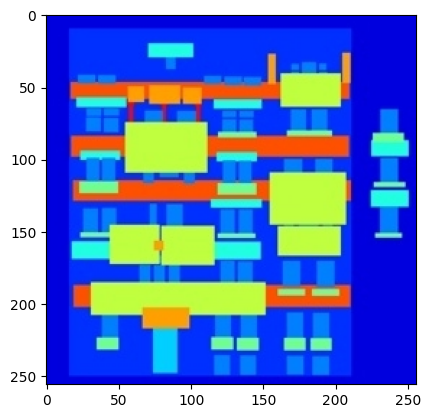

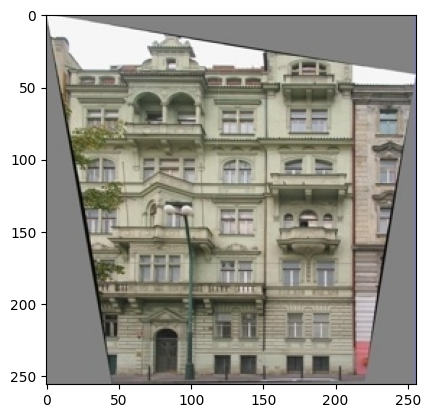

In [850]:
plt.figure()
plt.imshow(input_images_train[0]/255.0)
plt.figure()
plt.imshow(real_images_train[0]/255.0)

In [851]:
# The facade training set consist of 400 images
BUFFER_SIZE = 400
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [852]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [853]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [854]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [855]:
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

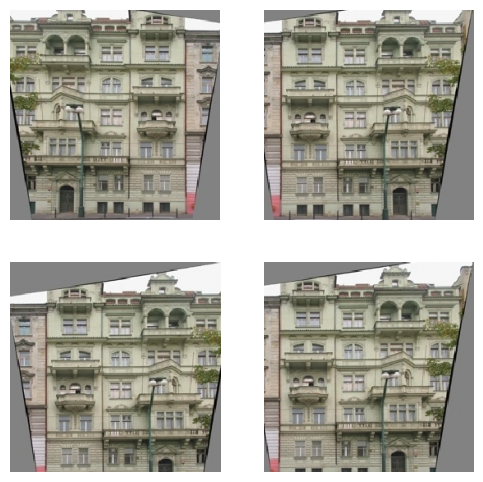

In [856]:
plt.figure(figsize=(6, 6))
for i in range(4):
  rj_inp, rj_re = random_jitter(input_images_train[0], real_images_train[0])
  plt.subplot(2, 2, i + 1)
  plt.imshow(rj_re / 255.0)
  plt.axis('off')
plt.show()

In [857]:
def load_image_train(input_images_train, real_images_train):
  input_image, real_image = random_jitter(input_images_train, real_images_train)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [858]:
def load_image_test(input_images_test, real_images_test):
  input_image, real_image = resize(input_images_test, real_images_test,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [859]:
train_dataset = tf.data.Dataset.from_tensor_slices((input_images_train, real_images_train))
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [860]:
test_dataset = tf.data.Dataset.from_tensor_slices((input_images_test, real_images_test))
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [861]:
OUTPUT_CHANNELS = 3

In [862]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(Conv2D(filters, size, strides=2, padding='same', kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(BatchNormalization())

  result.add(LeakyReLU())

  return result

In [863]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(input_images_train[0], 0))
print (down_result.shape)

(1, 128, 128, 3)


In [864]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = Sequential()
  result.add(Conv2DTranspose(filters, size, strides=2, padding='same', kernel_initializer=initializer, use_bias=False))

  result.add(BatchNormalization())

  if apply_dropout:
      result.add(Dropout(0.5))

  result.add(ReLU())

  return result

In [865]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


In [866]:
def Generator():
  inputs = Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = Conv2DTranspose(OUTPUT_CHANNELS, 4, strides=2, padding='same', kernel_initializer=initializer, activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = Concatenate()([x, skip])

  x = last(x)

  return Model(inputs=inputs, outputs=x)

In [867]:
generator = Generator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


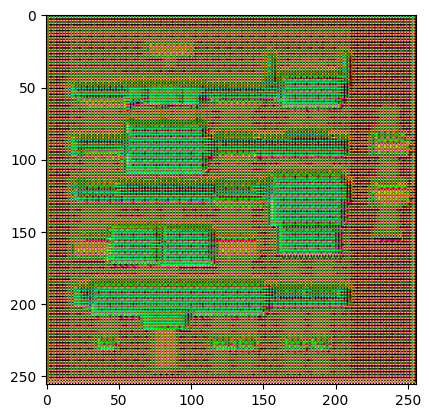

In [868]:
gen_output = generator(input_images_train[0, tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

In [869]:
LAMBDA = 100

In [870]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [871]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [872]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = Input(shape=[256, 256, 3], name='input_image')
  tar =Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = Conv2D(512, 4, strides=1, kernel_initializer=initializer, use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = BatchNormalization()(conv)

  leaky_relu = LeakyReLU()(batchnorm1)

  zero_pad2 = ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return Model(inputs=[inp, tar], outputs=last)

In [873]:
discriminator = Discriminator()

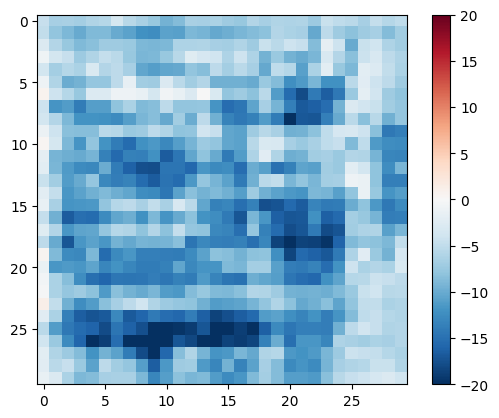

In [874]:
disc_out = discriminator([input_images_train[0, tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [875]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [876]:
generator_optimizer = Adam(2e-4, beta_1=0.5)
discriminator_optimizer = Adam(2e-4, beta_1=0.5)

In [877]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range from [-1, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [878]:
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  # we can update all gradients at once using gradient tape.
    gen_output = generator(input_image, training=True)

    # training discriminator with real and fake data.
    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [879]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


Time taken for 1000 steps: 1314.65 sec



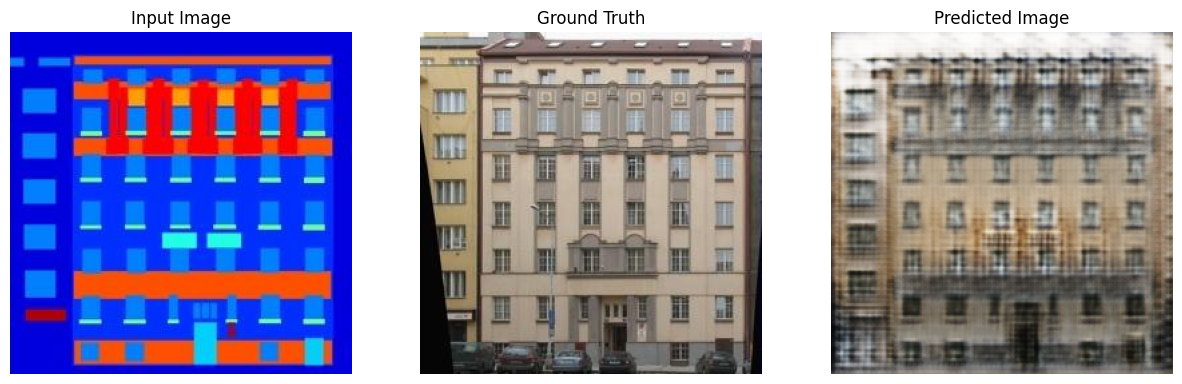

Step: 5k


In [880]:
fit(train_dataset, test_dataset, steps=5006)